In [1]:
import matplotlib.pyplot as plt
from plots.mpltoolkit import named_colors, fancy_legend, mpl_loc, load_mpl_presets
import numpy as np
import vice
import sys
load_mpl_presets()
print(sys.version_info)

/Users/astrobeard/Work/Research/VICErepos/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


sys.version_info(major=3, minor=10, micro=2, releaselevel='final', serial=0)


In [2]:
class exponential:
    
    def __init__(self, norm = 100, timescale = 1):
        self.norm = norm
        self.timescale = timescale
        
    def __call__(self, time):
        return self.norm * np.exp(-time / self.timescale)

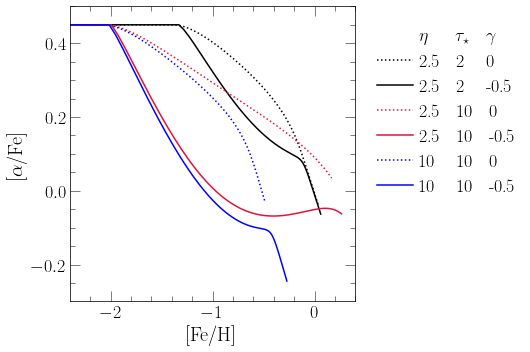

In [10]:
fig = plt.figure(figsize = (7.5, 5))
ax = fig.add_subplot(111)
ax.set_xlabel("[Fe/H]")
ax.set_ylabel(r"[$\alpha$/Fe]")
ax.set_xlim([-2.4, 0.4])
ax.set_ylim([-0.3, 0.5])
ax.set_yticks([-0.2, 0, 0.2, 0.4])

ax.plot([-0.1, 0], [0, 0.1], c = named_colors()["white"], alpha = 0,
    label = r"$\eta$\space\space\space\space\space$\tau_\star$\space\space\space$\gamma$")

vice.yields.ccsne.settings['o'] = 0.015
vice.yields.sneia.settings['o'] = 0
vice.yields.ccsne.settings['fe'] = 0.0012
with vice.singlezone(name = "tmp") as sz:
    vice.yields.sneia.settings['fe'] = 0.0017
    sz.func = exponential(timescale = 5)
    sz.mode = "sfr"
    sz.eta = 2.5
    sz.tau_star = 2
    sz.delay = 0.1
    out = sz.run(np.linspace(0, 10, 1001), overwrite = True, capture = True)
    ax.plot(out.history["[fe/h]"], out.history["[o/fe]"], c = named_colors()["black"], linestyle = ':',
        label = "2.5\space\space\space2\space\space\space\space0")
    vice.yields.sneia.settings['fe'] = lambda z: 0.0017 * (z / 0.014)**(-0.5) if z else 0
    out = sz.run(np.linspace(0, 10, 1001), overwrite = True, capture = True)
    ax.plot(out.history["[fe/h]"], out.history["[o/fe]"], c = named_colors()["black"],
        label = "2.5\space\space\space2\space\space\space\space-0.5")
    sz.tau_star = 10
    vice.yields.sneia.settings['fe'] = 0.0017
    out = sz.run(np.linspace(0, 10, 1001), overwrite = True, capture = True)
    ax.plot(out.history["[fe/h]"], out.history["[o/fe]"], c = named_colors()["crimson"], linestyle = ':',
        label = "2.5\space\space\space10\space\space\space0")
    vice.yields.sneia.settings['fe'] = lambda z: 0.0017 * (z / 0.014)**(-0.5) if z else 0
    out = sz.run(np.linspace(0, 10, 1001), overwrite = True, capture = True)
    ax.plot(out.history["[fe/h]"], out.history["[o/fe]"], c = named_colors()["crimson"],
        label = "2.5\space\space\space10\space\space\space-0.5")
#     ax.plot(out.history["time"], out.history["[o/h]"], color = named_colors()["crimson"])
#     ax.plot(out.history["time"], out.history["[fe/h]"], color = named_colors()["black"])
    
with vice.singlezone(name = "tmp") as sz:
    vice.yields.sneia.settings['fe'] = 0.0017
    sz.func = linear_exponential(timescale = 5)
    sz.mode = "sfr"
    sz.eta = 10
    sz.tau_star = 10
    sz.delay = 0.1
    out = sz.run(np.linspace(0, 10, 1001), overwrite = True, capture = True)
    ax.plot(out.history["[fe/h]"], out.history["[o/fe]"], c = named_colors()["blue"], linestyle = ':',
        label = "10\space\space\space\space10\space\space\space0")
    vice.yields.sneia.settings['fe'] = lambda z: 0.0017 * (z / 0.014)**(-0.5) if z else 0
    out = sz.run(np.linspace(0, 10, 1001), overwrite = True, capture = True)
    ax.plot(out.history["[fe/h]"], out.history["[o/fe]"], c = named_colors()["blue"],
        label = "10\space\space\space\space10\space\space\space-0.5")

kwargs = {
    "loc": mpl_loc("upper left"),
    "bbox_to_anchor": (1.02, 0.98)
}
leg = ax.legend(**kwargs)

plt.tight_layout()
for ext in ["pdf", "jpeg"]:
    kwargs = {}
    if ext == "jpeg": kwargs["dpi"] = 200
    plt.savefig("./afe_feh_tracks.%s" % (ext), **kwargs)
plt.show()

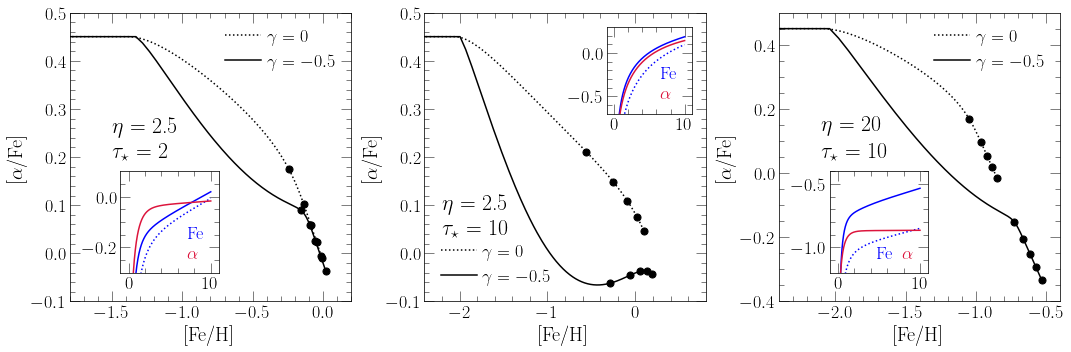

In [26]:
fig = plt.figure(figsize = (15, 5))
axes = []
insets = []
xlim = [
    [-1.8, 0.2],
    [-2.4, 0.8],
    [-2.4, -0.4]
]
ylim = [
    [-0.1, 0.5],
    [-0.1, 0.5],
    [-0.4, 0.5]
]
for i in range(3):
    axes.append(fig.add_subplot(131 + i))
    axes[i].set_xlabel("[Fe/H]")
    axes[i].set_ylabel(r"[$\alpha$/Fe]")
    axes[i].set_xlim(xlim[i])
    axes[i].set_ylim(ylim[i])
#     axes[i].set_yticks([-0.2, 0, 0.2, 0.4])
    
locs = [
    [0.18, 0.1, 0.35, 0.35],
    [0.65, 0.65, 0.3, 0.3],
    [0.18, 0.1, 0.35, 0.35]
]
ylim = [
    [-0.3, 0.1],
    [-0.7, 0.3],
    [-1.2, -0.4]
]
insets = []
for i in range(3):
    insets.append(axes[i].inset_axes(locs[i]))
    insets[i].set_xlim([-1, 11])
    insets[i].set_ylim(ylim[i])

vice.yields.ccsne.settings['o'] = 0.015
vice.yields.sneia.settings['o'] = 0
vice.yields.ccsne.settings['fe'] = 0.0012

eta = [2.5, 2.5, 20]
taustar = [2, 10, 10]
for i in range(3):
    with vice.singlezone(name = "tmp") as sz:
        vice.yields.sneia.settings['fe'] = 0.0017
        sz.func = exponential(timescale = 6)
        sz.mode = "sfr"
        sz.eta = eta[i]
        sz.tau_star = taustar[i]
        sz.delay = 0.1
        out = sz.run(np.arange(0, 10 + sz.dt, sz.dt), overwrite = True, capture = True)
        xvals = out.history["[fe/h]"]
        yvals = out.history["[o/fe]"]
        xvals[0] = -100
        yvals[0] = out.history["[o/fe]"][1]
        axes[i].plot(xvals, yvals,
            c = named_colors()["black"], linestyle = ':', label = r"$\gamma = 0$")
        insets[i].plot(out.history["time"], out.history["[fe/h]"], c = named_colors()["blue"], linestyle = ':')
        times = list(range(2, 11, 2))
        indeces = [out.history["time"].index(_) for _ in times]
        axes[i].scatter([out.history["[fe/h]"][_] for _ in indeces], [out.history["[o/fe]"][_] for _ in indeces],
            c = named_colors()["black"], s = 50)
        vice.yields.sneia.settings['fe'] = lambda z: 0.0017 * (z / 0.014)**(-0.5) if z else 0
        out = sz.run(np.arange(0, 10 + sz.dt, sz.dt), overwrite = True, capture = True)
        xvals = out.history["[fe/h]"]
        yvals = out.history["[o/fe]"]
        xvals[0] = -100
        yvals[0] = out.history["[o/fe]"][1]
        axes[i].plot(xvals, yvals,
            c = named_colors()["black"], label = r"$\gamma = -0.5$")
        insets[i].plot(out.history["time"], out.history["[fe/h]"], c = named_colors()["blue"],
            label = "Fe")
        insets[i].plot(out.history["time"], out.history["[o/h]"], c = named_colors()["crimson"],
            label = r"$\alpha$")
        times = list(range(2, 11, 2))
        indeces = [out.history["time"].index(_) for _ in times]
        axes[i].scatter([out.history["[fe/h]"][_] for _ in indeces], [out.history["[o/fe]"][_] for _ in indeces],
            c = named_colors()["black"], s = 50)
        
for i in range(3):
    kwargs = {
        "loc": mpl_loc("lower right"),
        "handlelength": 0,
        "bbox_to_anchor": (1.01, -0.05)
    }
    if i == 2:
        kwargs["ncol"] = 2
        kwargs["columnspacing"] = 0.2
    else:
        kwargs["labelspacing"] = 0.2
    leg = insets[i].legend(**kwargs)
    fancy_legend(leg, ["blue", "crimson"])
    
for i in range(3):
    kwargs = {
        "loc": mpl_loc("lower left") if i == 1 else mpl_loc("upper right")
    }
    leg = axes[i].legend(**kwargs)
    
loc = [
    [-1.5, 0.2],
    [-2.2, 0.04],
    [-2.1, 0.05]
]
for i in range(3):
    axes[i].text(loc[i][0], loc[i][1], r"$\tau_\star$ = %g" % (taustar[i]), fontsize = 22)
    if i == 2: loc[i][1] += 0.03
    axes[i].text(loc[i][0], loc[i][1] + 0.05, r"$\eta$ = %g" % (eta[i]), fontsize = 22)

plt.tight_layout()
for ext in ["pdf", "jpeg"]:
    kwargs = {}
    if ext == "jpeg": kwargs["dpi"] = 200
    plt.savefig("../paper/onezone_application.%s" % (ext), **kwargs)
plt.show()